Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Raghav Sharma"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
# all imports and env variables
import pandas as pd
import numpy as np
import datetime
from pandas.plotting import autocorrelation_plot, scatter_matrix

import matplotlib.pyplot as plt


data_fb = pd.read_csv("fb_2012-7-31_2017-6-30.csv")
data_mmm = pd.read_csv("mmm_2012-7-31_2017-6-30.csv")
data_ibm = pd.read_csv("ibm_2012-7-31_2017-6-30.csv")
data_amzn = pd.read_csv("amzn_2012-7-31_2017-6-30.csv")


### Data Modification

Due to issues with the data pull from Qunadl and Yahoo Finance we are going to leverage the data that is available in the csv file. 

The data being leveraged has to be prepared for time series analysis. One piece of update is to ensure that the data is index based on the timestamp. We will be setting the index to Date column, in place


In [3]:
data_fb.Date = pd.to_datetime(data_fb.Date)
data_mmm.Date = pd.to_datetime(data_mmm.Date)
data_ibm.Date = pd.to_datetime(data_ibm.Date)
data_amzn.Date = pd.to_datetime(data_amzn.Date)


In [4]:
data_fb.set_index('Date', inplace=True)
data_mmm.set_index('Date', inplace=True)
data_ibm.set_index('Date', inplace=True)
data_amzn.set_index('Date', inplace=True)


## Assumptions

#### Following assumptions and decisions have been made before analysis
1. The approach take is to import data with Quandl. This is primary due to fix_yahoo_finance not being a functional option at all.
2. All the data has been pulled in at the same time with the help if passing a list to the DataReader function
3. All analysis for 60months is being done by setting the end date as today: March 22, 2020. And starting date is set to 60 months in the past, i.e, March 22, 2015

 Data is imported from all 4 stock sources as expected and the primary grouping is done based on Attributes of the stock. We will extract only the Adjusted Close Prices for now

In [5]:
data_fb_adjClose = data_fb.AdjClose
data_mmm_adjClose = data_mmm.AdjClose
data_ibm_adjClose = data_ibm.AdjClose
data_amzn_adjClose = data_amzn.AdjClose


In [6]:
data_fb_adjClose.isna().sum()

0

In [7]:
data_mmm_adjClose.isna().sum()

0

In [8]:
data_ibm_adjClose.isna().sum()

0

In [9]:
data_amzn_adjClose.isna().sum()

0

### Answer 2 - Resampling data 
Based on the requirement we will be resampling data for month end and aggregating the data. This will be done by setting the resampling scope to "M" and sampling on "mean". The data morphing will look as following.

In [10]:
fb_resample_mean = data_fb_adjClose.resample("BM").mean()
mmm_resample_mean = data_mmm_adjClose.resample("BM").mean()
ibm_resample_mean = data_ibm_adjClose.resample("BM").mean()
amzn_resample_mean = data_amzn_adjClose.resample("BM").mean()

## Answer 3 - Let's understand the randomness in the data that is downloaded.

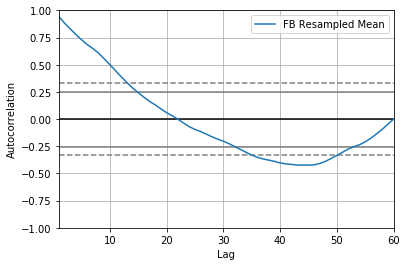

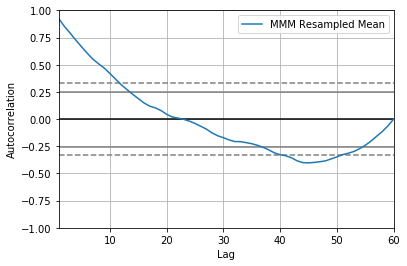

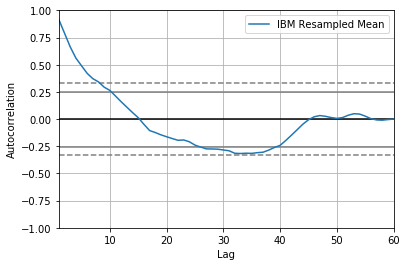

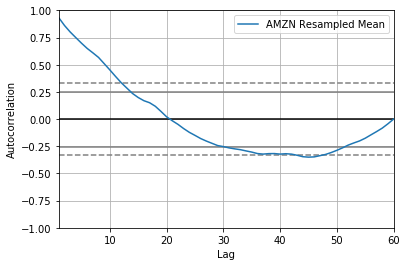

In [37]:
p1 = autocorrelation_plot(fb_resample_mean,label="FB Resampled Mean")
plt.show()
p2 = autocorrelation_plot(mmm_resample_mean,label="MMM Resampled Mean")
plt.show()
p3 = autocorrelation_plot(ibm_resample_mean,label="IBM Resampled Mean")
plt.show()
p4 = autocorrelation_plot(amzn_resample_mean,label="AMZN Resampled Mean")
plt.show()

### Answer 3
Looking at all four of the autocorrelation cover we can confirm that they follow a more of less similar pattern. Initially the stocks are significantly and positively autocorrelated. Then they are insignificantly postive and then negatively autocorrelated. 

The exception to this is the IBM stock, that is closest to 0 autocorrelation towards the 45th lag. This means that IBM stock shows randomness at the end of the analysis time period.

## Looking at Month-End Returns


In [15]:
fb_month_returns = fb_resample_mean/fb_resample_mean.shift(1)
fb_month_returns = fb_month_returns.dropna()
mmm_month_returns = mmm_resample_mean/mmm_resample_mean.shift(1)
mmm_month_returns = mmm_month_returns.dropna()
ibm_month_returns = ibm_resample_mean/ibm_resample_mean.shift(1)
ibm_month_returns = ibm_month_returns.dropna()
amzn_month_returns = amzn_resample_mean/amzn_resample_mean.shift(1)
amzn_month_returns = amzn_month_returns.dropna()

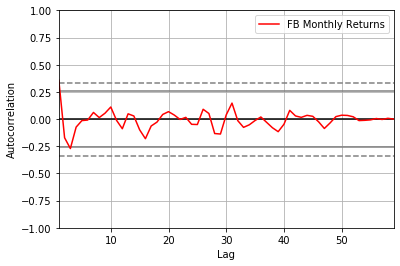

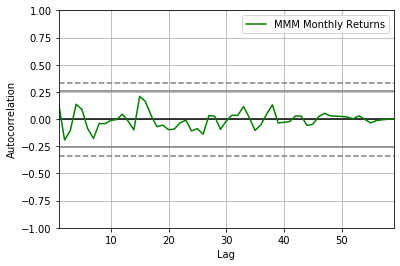

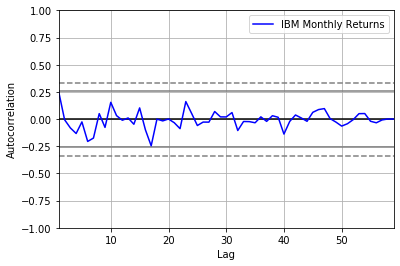

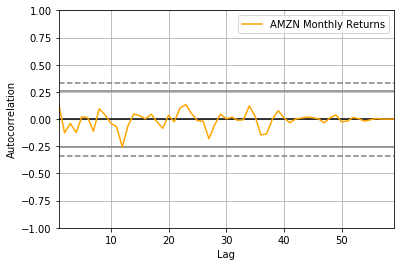

In [42]:
autocorrelation_plot(fb_month_returns,color="red", label="FB Monthly Returns")
plt.show()
autocorrelation_plot(mmm_month_returns,color="green", label="MMM Monthly Returns")
plt.show()
autocorrelation_plot(ibm_month_returns,color="blue", label="IBM Monthly Returns")
plt.show()
autocorrelation_plot(amzn_month_returns,color="orange", label="AMZN Monthly Returns")
plt.show()

In [20]:
stocks_month_returns = pd.concat([fb_month_returns,mmm_month_returns,ibm_month_returns,amzn_month_returns],axis=1)
stocks_month_returns.columns = ["FB Returns","MMM Returns", "IBM Returns", "AMZN Returns" ]
stocks_month_returns.head(10)

,FB Returns,MMM Returns,IBM Returns,AMZN Returns
Date,,,,
2012-08-31,0.926204,1.014062,1.011697,1.024406
2012-09-28,1.025869,1.007795,1.031623,1.070073
2012-10-31,0.999566,0.997554,0.994509,0.955244
2012-11-30,1.109951,0.970249,0.945527,0.959588
2012-12-31,1.185492,1.037156,1.007926,1.078471
2013-01-31,1.117960,1.060270,1.026474,1.061584
2013-02-28,0.926014,1.052334,1.021171,0.982526
2013-03-29,0.954370,1.027485,1.051734,1.007816
2013-04-30,0.992606,1.006598,0.970403,0.989893


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024CD22E0BC8>,
      dtype=object)

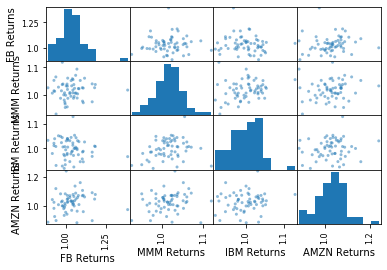

In [23]:
scatter_matrix(stocks_month_returns)